In [63]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [64]:
titanic_df = pd.read_csv("/Users/kimminsoo/Documents/titanic_train.csv")

In [65]:
titanic_df.head()
#passenger ID: 탑싀객 일련번호
#Survived: 생존여부(label) : 0: 사망, 1:생존
# Pclass: 선실 등급
# SibSp:  동승한 형제자매 혹은 배우자 인원수
#Parch:  동승한 부모님 또는 자녀수
# Ticket: 티켓 번호
#Embaked: 중간 정착 항구: C: Cherbourg, Q= Queenstown, S=Southhampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
#일단 한 번 해보기
# target(label): Survived
# feature: 나머지 컬럼

X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df.Survived

In [68]:
#0) 전처리
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [69]:
# null값 처리, string 처리필요

PassengerId, Name, Ticket, Cabin는 Survived에 영향을 끼치지 않는다고 판단하여 drop을 통해 삭제

In [70]:
#문자열 피처를 삭제(문자열이 있으면 학습할 수 없음)

X_titanic_df.drop(['PassengerId', 'Name', "Ticket", 'Cabin'], axis=1, inplace=True)


In [71]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [72]:
# 2) 문자열 피처 인코딩(숫자값으로 변환)
## 성별 피처를 LabelEncoding하여 숫자로 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_titanic_df['Sex'] = le.fit_transform(X_titanic_df.Sex)
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
888,3,0,NaN,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [73]:
# 라벨 인코딩 내용(클래스) 확인
le.classes_

array(['female', 'male'], dtype=object)

In [74]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [75]:
X_titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [76]:
# Embarked 피처를 onehot Encoding하여 숫자로 변환(get_dummies)
# Enbarked에는 Null값이 2개 있음 - 처리요망

X_titanic_df = pd.get_dummies(X_titanic_df)
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [77]:
#3) NaN  결측치 채워넣기 (Age 항목 714개)

X_titanic_df.Age.fillna(X_titanic_df.Age.mean(), inplace=True)

In [78]:
X_titanic_df.info() #Age 값의 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [79]:
# Age columms을 Age_group컬럼으로 변환
## 0 ~ 5 : Baby, 6~JK: Child, 13~18: Teenager, 19~25: Student, 
## 26~35: Young Adult, 36~60: Adult, 61~: elderly
X_titanic_df.Age.value_counts()

X_titanic_df['Age_group'] = np.digitize(X_titanic_df.Age, [0, 6, 13, 19, 26, 36, 61])

X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_group
0,3,1,22.0,1,0,7.2500,0,0,1,4
1,1,0,38.0,1,0,71.2833,1,0,0,6
2,3,0,26.0,0,0,7.9250,0,0,1,5
3,1,0,35.0,1,0,53.1000,0,0,1,5
4,3,1,35.0,0,0,8.0500,0,0,1,5


In [80]:
X_titanic_df.drop(['Age'], axis=1, inplace=True)

In [95]:
X_titanic_df.Age_group.value_counts().sort_index()


1     44
2     25
3     70
4    162
5    373
6    195
7     22
Name: Age_group, dtype: int64

In [96]:
#1) 학습용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df, random_state=213 )

In [98]:
#2) 결정트리 객체 생성
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [99]:
#3) 학습
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
# 4) 평가(train_score, test_score)
## trian_score가 test_score보다 크므로 과적합되었다고 볼수있음.
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt.predict(X_train)
print((f'train_score: {accuracy_score(y_train, y_pred):.3f}'))

y_pred = dt.predict(X_test)
print((f'train_score: {accuracy_score(y_test, y_pred):.3f}'))

train_score: 0.952
train_score: 0.830


In [104]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9520958083832335
0.8295964125560538


In [112]:
# 평가 점수가 낮아 전처리를 세분화해보기로 함
#결정트리 최적화 - 하이퍼파라미터 튜닝 & 교차검증 -: GridSearchCV()
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth' :[3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'splitter': ['best']
}
grid_dt = GridSearchCV(dt, param_grid=dt_params, cv=5)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 15],
                         'splitter': ['best']})

In [113]:
grid_dt.best_params_

{'max_depth': 7, 'min_samples_split': 10, 'splitter': 'best'}

In [114]:
grid_dt.score(X_train, y_train)

0.8622754491017964

In [115]:
grid_dt.score(X_test, y_test)

0.7937219730941704

In [142]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='lbfgs', max_iter=500)
lr_clf.fit(X_train,y_train)
print(f'train_scores: {lr_clf.score(X_train,y_train)}')
print(f'test_scores: {lr_clf.score(X_test,y_test)}')
print('')
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)
print(f'train_scores: {svm_clf.score(X_train,y_train)}')
print(f'test_scores: {svm_clf.score(X_test,y_test)}')

train_scores: 0.8218562874251497
test_scores: 0.7847533632286996

train_scores: 0.6916167664670658
test_scores: 0.6367713004484304


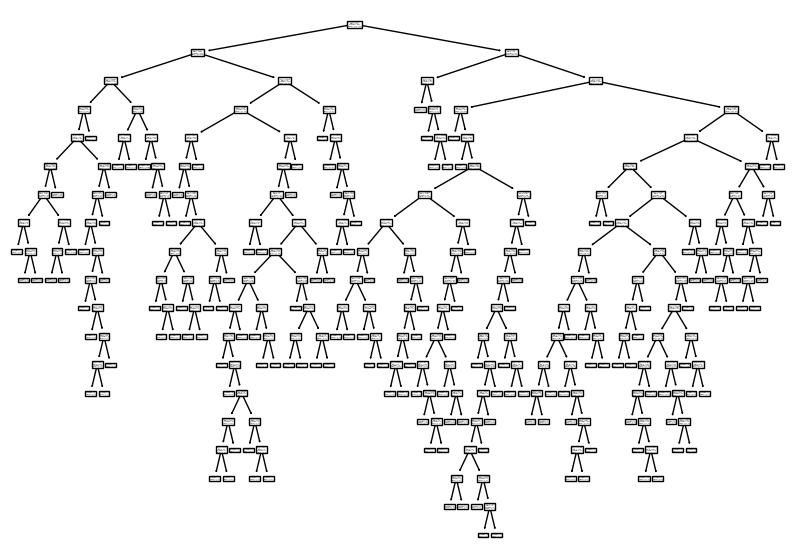

In [126]:
# 결정 트리 시각화
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [128]:
import graphviz

In [132]:
from sklearn.tree import export_graphviz
label_names = ['unsurvived', 'survived']
dot_data = export_graphviz(dt, class_names=label_names,
                feature_names=X_titanic_df.columns,
                filled=True,
                impurity=True)

graphviz.Source(dot_data)

data = graphviz.Source(dot_data, format('png'))
data.render('titanic_graphviz')

'titanic_graphviz.pdf'

In [133]:
# 중요 특성 파악
grid_dt.best_estimator_.feature_importances_

array([0.16419052, 0.52596849, 0.04874975, 0.0110546 , 0.16979145,
       0.00217848, 0.        , 0.00161603, 0.07645067])

In [136]:
# 특성 중요도를 시리즈로 전환
print(pd.Series(data=grid_dt.best_estimator_.feature_importances_,
          index=X_titanic_df.columns))

# 특성 중요도를 데이터프레임으로 전환
imp_df = pd.DataFrame({'feature': X_titanic_df.columns,
             'importance': grid_dt.best_estimator_.feature_importances_})

Pclass        0.164191
Sex           0.525968
SibSp         0.048750
Parch         0.011055
Fare          0.169791
Embarked_C    0.002178
Embarked_Q    0.000000
Embarked_S    0.001616
Age_group     0.076451
dtype: float64


In [137]:
imp_df.sort_values(by='importance', ascending=False)

,feature,importance
1,Sex,0.525968
4,Fare,0.169791
0,Pclass,0.164191
8,Age_group,0.076451
2,SibSp,0.048750
3,Parch,0.011055
5,Embarked_C,0.002178
7,Embarked_S,0.001616
6,Embarked_Q,0.000000


<AxesSubplot:ylabel='feature'>

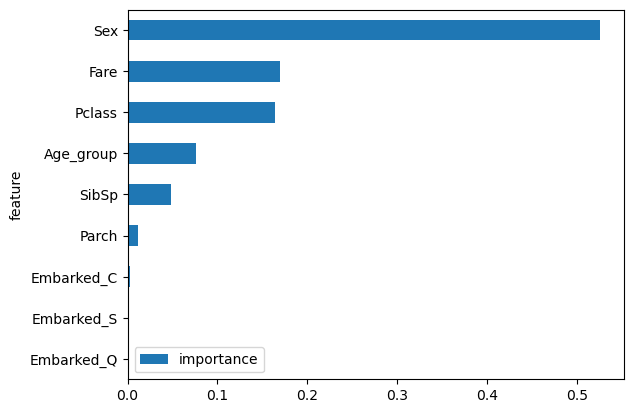

In [141]:
imp_df.sort_values(by='importance').set_index('feature').plot(kind='barh')

In [ ]:
%matplotlib inline

In [ ]:
#결정트리 시각화

In [ ]:
#피처와 라벨 정보를 기입하여 가독성 향상


In [ ]:
# 간단한 트리 생성

In [ ]:
#결정트리 그래프를 파일로 받아 Pdf 저장
